In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
house_csv = './datasets/housing-data.csv'

In [3]:
house = pd.read_csv(house_csv)
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [4]:
house['price'] = house['price'] / 1000

In [5]:
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399.9
1,1600,3,28,329.9
2,2400,3,44,369.0
3,1416,2,49,232.0
4,3000,4,75,539.9


In [6]:
x = house[['sqft', 'bdrms', 'age']]
x['intercept'] = 1

In [8]:
x = x[['intercept', 'sqft', 'bdrms', 'age']].values

In [16]:
print(x[0:3, :])

[[   1 2104    3   70]
 [   1 1600    3   28]
 [   1 2400    3   44]]


In [18]:
price = house['price'].values

In [21]:
beta_vec = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), price)
print(beta_vec)

[  9.24516278e+01   1.39334847e-01  -8.62147046e+00  -8.12178776e-02]


In [26]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
linreg.fit(x, price)

print(linreg.coef_)

[  9.24516278e+01   1.39334847e-01  -8.62147046e+00  -8.12178776e-02]


In [27]:
yhat = np.dot(x, beta_vec)

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Don't forget to turn on plotting display in the notebook
%matplotlib inline

In [29]:
data = datasets.load_boston()

In [39]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [48]:

print(data.data[0:3])
print(data.target[0:3])

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]]
[ 24.   21.6  34.7]


In [49]:
import pandas as pd
import numpy as np

In [50]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [51]:
target = data.target

In [53]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


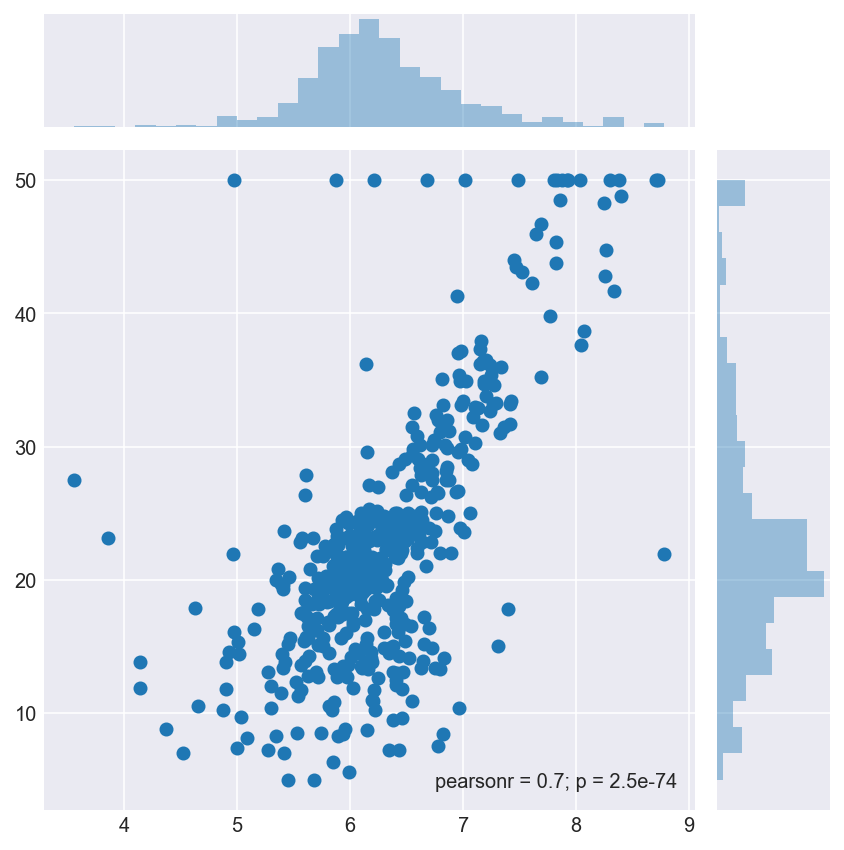

In [54]:
sns.jointplot(df.RM.values, target)

In [55]:
lm = linear_model.LinearRegression()

In [57]:
x = df[['RM']]
y = target

model = lm.fit(x, y)

In [58]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.483525455991


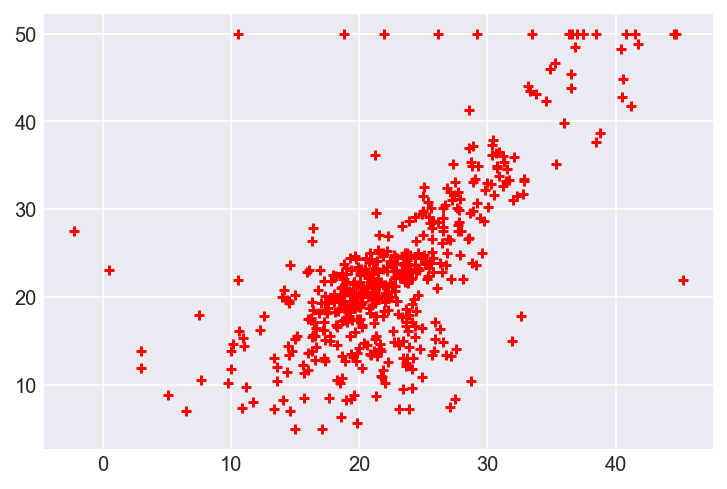

In [70]:
predictions = model.predict(x)
score = model.score(x,y)


plt.scatter(predictions, y, s=30, c='r',marker='+', zorder=10)
print(score)

In [71]:
print(model.coef_)

[ 9.10210898]


In [72]:
print(model.intercept_)

-34.6706207764


In [73]:
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
print(np.sqrt(mean_squared_error(target, predictions)))
print(r2_score(target,predictions))

6.60307138922
0.483525455991


In [75]:
X = df[['RM', 'LSTAT']].values

In [76]:
y = target

In [77]:
model = lm.fit(X,y)

In [79]:
predictions = model.predict(X)
score = model.score(X,y)

0.63856160626


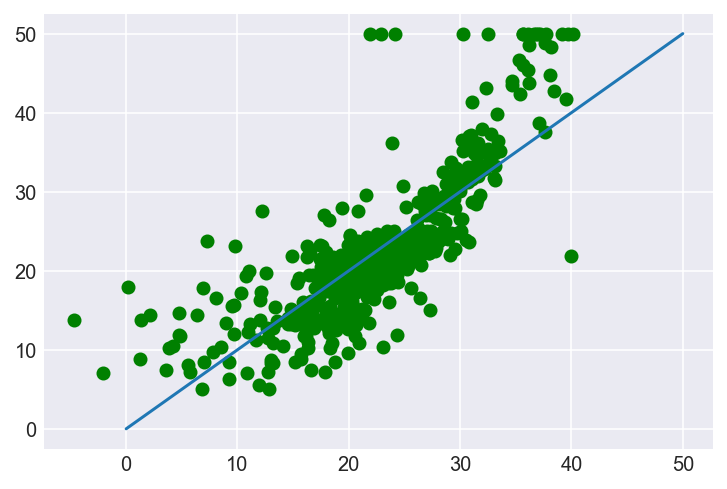

In [84]:
plt.scatter(predictions,y, c='green')

plt.plot([0, np.max(y)], [0, np.max(y)])
print(score)

In [85]:
print(model.coef_)
print(model.intercept_)

[ 5.09478798 -0.64235833]
-1.35827281187


In [88]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [89]:
X = df[['TAX', 'AGE', 'CRIM', 'LSTAT']].values

In [90]:
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

In [ ]:
y = target

model = sm.OLS(y,X)
mode